## Decision Tree Classifier :

Objective :

1. Apply Decision Tree Classifier on all the vectorizers.
2. Before applying the model, please read the sklearn documentation and go through all
the parameters that it can accept and try to use some in your assignment if you think that
can help in reducing the time and improving your model performance.
3. Choose different metric other than accuracy for choosing the best hyperparameter,
which is apt for imbalanced datasets and accuracy sometimes gives us false conclusions
about the model performance sometimes.
4. Do hyperparameter tuning or some feature engineering and make your model better by
reducing the false positives. (Ex: adding the length of the reviews, getting some features
from the summary column)
5. Take 5 or 6 different depth values but in a wider range ex: 3, 5, 10, 15 etc
6. Get important features for BOW and TFIDF vectorizers.
7. Visualize your decision tree with Graphviz. It helps you to understand how the decision is
taking when given a new vector. Print the words in each node of the decision tree
instead of its index.

Note : we dont need to std our data 

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
#taking cleaned data i.e in Reviews table  from final sql database
#making connection with database 
conn = sqlite3.connect('final.sqlite') 
final = pd.read_sql_query(""" SELECT * FROM Reviews ORDER BY Time""", conn) 

C:\Users\nisha\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
final = final[:100000]
print(len(final))

100000


In [3]:
CleanedText = final['CleanedText'];
text=final.CleanedText.values
#print(CleanedText)
CleanedText_Class = [];
for i in final['Score']:
    if (i == 'positive'):
        CleanedText_Class.append(1)
    else:
        CleanedText_Class.append(0)
    

In [4]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
# ====================================
# split the data set into train and test for BoW
#X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
X_1, X_test, y_1, y_test = cross_validation.train_test_split(text, CleanedText_Class, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)

C:\Users\nisha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
import os

from sklearn import tree
import graphviz
import pydotplus
from IPython.display import Image

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from wordcloud import WordCloud
import seaborn as sns; 
def most_informative_feature_for_binary_classification(vectorizer, w,n_features,is_print = True):
#     class_labels = classifier.classes_
    
    feature_names = vectorizer.get_feature_names()
    topn_class = sorted(zip(w, feature_names), reverse=True)[:n_features]
    
    if is_print == True:
        print("\nTop %s features" %(n_features))
        for w, feat in topn_class:
            print(w, feat)
        
    else:
        top_features = []
        for coef, feat in topn_class:
            top_features.append(feat)
            
        return top_features;


def top_features_wordcloud_generated_image_fun(features_list):
    wordcloud = WordCloud(width=600, height=600, margin=0,background_color="white").generate(" ".join(features_list))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

## Bow
Applying Bow vectorizer on data

In [9]:
#BOW 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vocabulary= vectorizer.fit(X_tr)
#print("the shape of out text BOW vectorizer ",vocabulary.get_shape())
#bow_x_tr.shape
# bow_tr_array

In [10]:
bow_x_tr= vectorizer.transform(X_tr)
print("the shape of out text BOW vectorizer ",bow_x_tr.get_shape())

the shape of out text BOW vectorizer  (49000, 26709)


In [11]:
bow_x_cv= vectorizer.transform(X_cv)
print("the shape of out text BOW vectorizer ",bow_x_cv.get_shape())

the shape of out text BOW vectorizer  (21000, 26709)


### Apply Simple Crossvalidation Bow - Hyperparameter(depth) tuning

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [02:53<00:00, 14.64s/it]


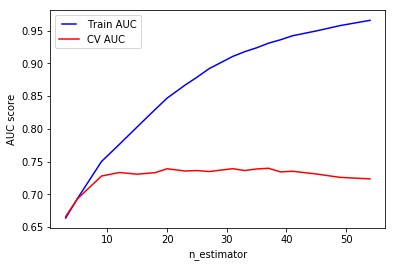

In [9]:
max_depths = [3,5,9,12,15,18,20,23,25,27,31,33,35,37,39,41,45,49,54]
train_results = []
cv_results = []
for depth in tqdm(max_depths):
    rf = DecisionTreeClassifier(max_depth=depth,random_state=0,class_weight='balanced')
    rf.fit(bow_x_tr, y_tr)
    train_pred = rf.predict(bow_x_tr)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_tr, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(bow_x_cv)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_cv, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    cv_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, cv_results, 'r', label='CV AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.show()

from this curve after max_depth = 10 as we are increasing the depth the cv score is not increasing means train data is overfitting so we need to take max_depth = 10

### Getting Performance and Important features with optimal DT max_depth

In [12]:
optimal_max_depth = 10
clf = DecisionTreeClassifier(max_depth=optimal_max_depth,random_state=0,class_weight='balanced')
clf = clf.fit(bow_x_tr, y_tr);
pred = clf.predict(bow_x_cv);
sc = f1_score(y_cv, pred) * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 10 and score is = 78.085448


### Top Important features 

In [13]:
w = clf.feature_importances_
most_informative_feature_for_binary_classification(vectorizer,w,10,is_print = True)


Top 10 features
0.17452667376512748 great
0.10020172770192506 best
0.09789782623196787 disappoint
0.08509342747794942 love
0.07061573585468243 delici
0.03796055591688953 favorit
0.036480255304001216 excel
0.034203759259291616 perfect
0.02675639145914369 good
0.020577752228131938 product


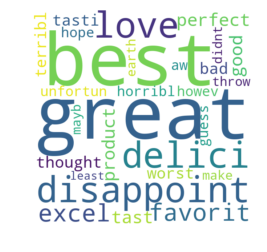

In [14]:
top_features = most_informative_feature_for_binary_classification(vectorizer,w,30,is_print = False)
top_features_wordcloud_generated_image_fun(top_features)

### Visualizing Decision Tree with Graphviz for Bow.

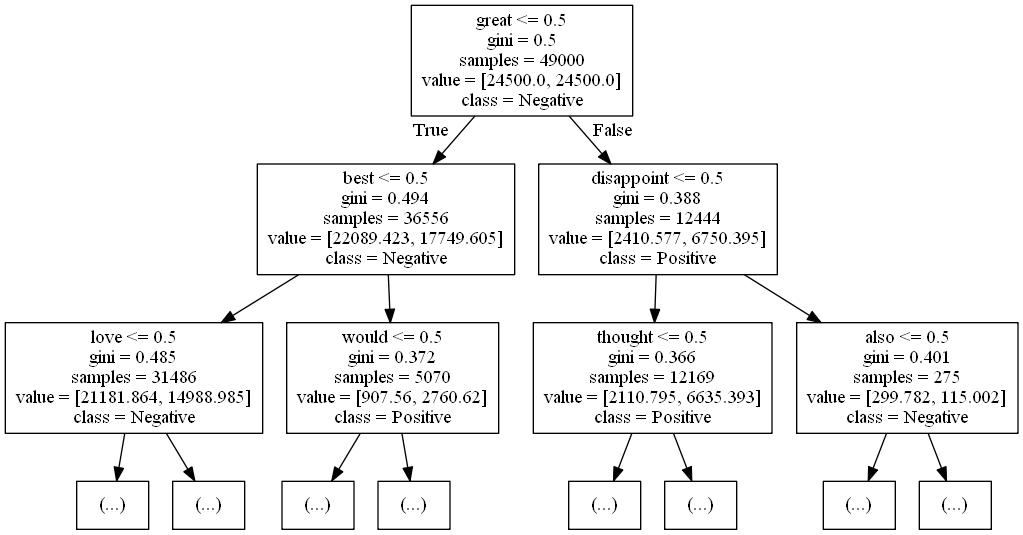

In [27]:
import collections
feature_names = vectorizer.get_feature_names()
# Create DOT data
dot_data = tree.export_graphviz(clf,max_depth=2,out_file=None,feature_names=feature_names,class_names=['Negative','Positive'])
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
# $ dot -Tpng tree.dot -o tree.png 
Image(graph.create_png())

In [28]:
# saving full depth decision tree to png file 
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=feature_names,class_names=['Negative','Positive'])
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png('bowDecisiontree.png')

True

### Performance measure of Test Data on Trained Model with optimal value of max_depth different performance metrix

In [15]:
# vectorizing the test data into Bow for model implimentation 
bow_x_test= vectorizer.transform(X_test)
print("the shape of out text BOW vectorizer ",bow_x_test.get_shape())

the shape of out text BOW vectorizer  (30000, 26709)


In [17]:
clf = DecisionTreeClassifier(max_depth=optimal_max_depth,random_state=0,class_weight='balanced')
clf = clf.fit(bow_x_tr, y_tr);
pred = clf.predict(bow_x_test);
## getting model performance using f1_score
sc = f1_score(y_test, pred) * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 10 and score is = 77.903906


In [18]:
## getting model performance using weighted f1_score 
sc = f1_score(y_test, pred,average='weighted') * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 10 and score is = 72.855665


In [19]:
## getting model performance using recall_score
sc = recall_score(y_test, pred) * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 10 and score is = 65.769920


In [20]:
## getting model performance using precision_score
sc = precision_score(y_test, pred) * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 10 and score is = 95.528005



The confusion_matrix of the DT with max_depth = 10 
[[ 2949   808]
 [ 8983 17260]]


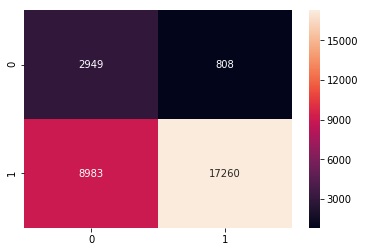

In [21]:
## getting model performance using confusion_matrix
confusion_matrix_val = confusion_matrix(y_test, pred)
print('\nThe confusion_matrix of the DT with max_depth = %d ' % (optimal_max_depth))
print(confusion_matrix_val);
## plotting headmap 
cunfusion_lable = confusion_matrix_val
ax = sns.heatmap(confusion_matrix_val,annot=cunfusion_lable, fmt='')

In [22]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel() 
print("\n Test confusion_matrix for max_depth = %d " %(optimal_max_depth))

TPR = ((tp)/(fn+tp)) * float(100);
FPR = (fp)/(tn+fp) * float(100);
FNR = (fn)/(fn+tp) * float(100);
TNR = (tn)/(tn+fp) * float(100)
print('\n******* for BOW *********')
print('\n****TPR is %d%%' % (TPR))
print('\n****FPR is %d%%' % (FPR))
print('\n****FNR is %d%%' % (FNR))
print('\n****TNR is %d%%' % (TNR))


 Test confusion_matrix for max_depth = 10 

******* for BOW *********

****TPR is 65%

****FPR is 21%

****FNR is 34%

****TNR is 78%


********BOW ENDS*******

## TF-IDF

In [23]:
#tfidf 
# tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf_vect = TfidfVectorizer()
vocabulary = tf_idf_vect.fit(X_tr)
#print("the shape of out text TF-IDF vectorizer ",tf_idf_x_tr.get_shape())

In [24]:
tf_idf_x_tr = tf_idf_vect.transform(X_tr)
print("the shape of out text TF-IDF vectorizer ",tf_idf_x_tr.get_shape())

the shape of out text TF-IDF vectorizer  (49000, 26709)


In [25]:
tf_idf_x_cv = tf_idf_vect.transform(X_cv)
print("the shape of out text TF-IDF vectorizer ",tf_idf_x_cv.get_shape())

the shape of out text TF-IDF vectorizer  (21000, 26709)


### Apply Simple Crossvalidation TF-IDF - Hyperparameter(depth) tuning

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [05:34<00:00, 24.76s/it]


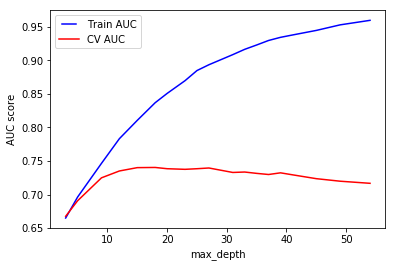

In [26]:
max_depths = [3,5,9,12,15,18,20,23,25,27,31,33,35,37,39,41,45,49,54]
train_results = []
cv_results = []
for depth in tqdm(max_depths):
    rf = DecisionTreeClassifier(max_depth=depth,random_state=0,class_weight='balanced')
    rf.fit(tf_idf_x_tr, y_tr)
    train_pred = rf.predict(tf_idf_x_tr)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_tr, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(tf_idf_x_cv)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_cv, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    cv_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, cv_results, 'r', label='CV AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.show()

### Getting Performance and Important features with optimal DT max_depth

In [27]:
optimal_max_depth = 12
clf = DecisionTreeClassifier(max_depth=optimal_max_depth,random_state=0,class_weight='balanced')
clf = clf.fit(tf_idf_x_tr, y_tr);
pred = clf.predict(tf_idf_x_cv);
sc = f1_score(y_cv, pred) * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 12 and score is = 81.102362


### Top Important features

In [28]:
w = clf.feature_importances_
most_informative_feature_for_binary_classification(tf_idf_vect,w,10,is_print = True)


Top 10 features
0.15666995569103442 great
0.09522542407257326 best
0.08536471246221787 love
0.07771581688553444 disappoint
0.06944879347163858 delici
0.03891839385615923 favorit
0.03728062915581019 perfect
0.033140691036105036 excel
0.02875705085669846 good
0.025506203546738344 thought


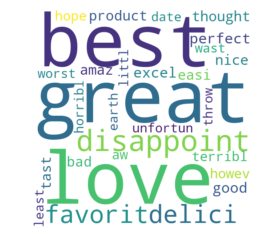

In [29]:
top_features = most_informative_feature_for_binary_classification(tf_idf_vect,w,30,is_print = False)
top_features_wordcloud_generated_image_fun(top_features)

### Visualize your decision tree with Graphviz for TF-IDF.

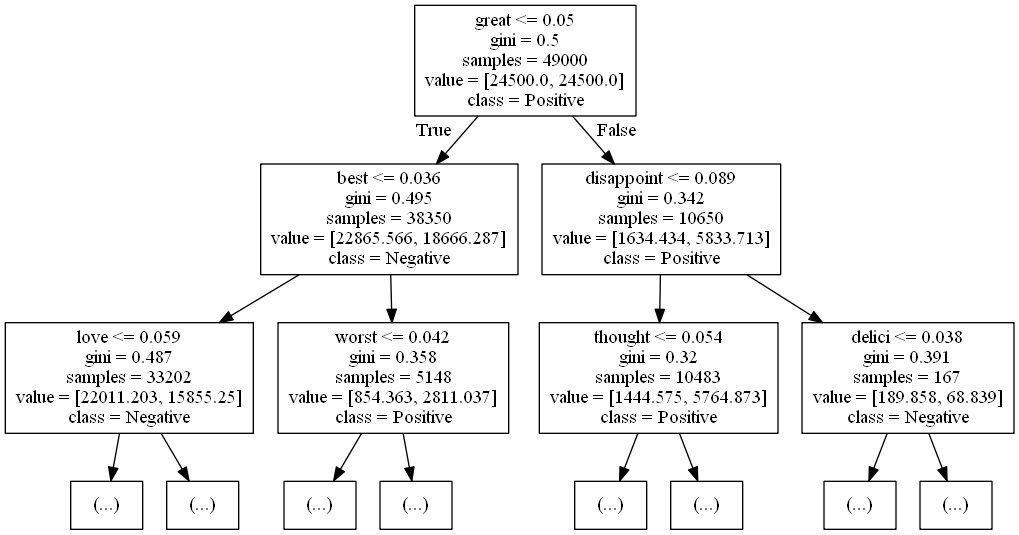

In [30]:
feature_names = tf_idf_vect.get_feature_names()
# Create DOT data
dot_data = tree.export_graphviz(clf,max_depth=2,out_file=None,feature_names=feature_names,class_names=['Negative','Positive'])
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
# $ dot -Tpng tree.dot -o tree.png 
Image(graph.create_png())

In [31]:
# saving full depth decision tree to png file 
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=feature_names,class_names=['Negative','Positive'])
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png('tfidfDecisiontree.png')

True

### Performance measure of Test Data on Trained Model with optimal value of max_depth different performance metrix

In [32]:
tf_idf_x_test= tf_idf_vect.transform(X_test)
print("the shape of out text TF-IDF vectorizer ",tf_idf_x_test.get_shape())

the shape of out text TF-IDF vectorizer  (30000, 26709)


In [33]:
clf = DecisionTreeClassifier(max_depth=optimal_max_depth,random_state=0,class_weight='balanced')
clf = clf.fit(tf_idf_x_tr, y_tr);
pred = clf.predict(tf_idf_x_test);
## getting model performance using f1_score 
sc = f1_score(y_test, pred) * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 12 and score is = 80.667753


In [34]:
## getting model performance using weighted f1_score 
sc = f1_score(y_test, pred,average='weighted') * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 12 and score is = 75.556260


In [35]:
## getting model performance using recall_score 
sc = recall_score(y_test, pred) * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 12 and score is = 69.786229


In [36]:
## getting model performance using precision_score
sc = precision_score(y_test, pred) * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 12 and score is = 95.569587



The confusion_matrix of the DT with max_depth = 12 
[[ 2908   849]
 [ 7929 18314]]


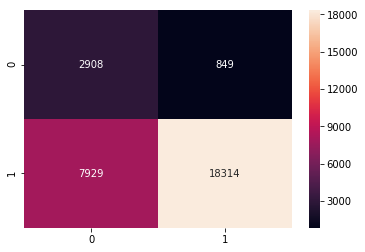

In [37]:
## getting model performance using confusion_matrix
confusion_matrix_val = confusion_matrix(y_test, pred)
print('\nThe confusion_matrix of the DT with max_depth = %d ' % (optimal_max_depth))
print(confusion_matrix_val);
## plotting Heatmap
cunfusion_lable = confusion_matrix_val
ax = sns.heatmap(confusion_matrix_val,annot=cunfusion_lable, fmt='')

In [38]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel() 
print("\n Test confusion_matrix for max_depth = %d " %(optimal_max_depth))

TPR = ((tp)/(fn+tp)) * float(100);
FPR = (fp)/(tn+fp) * float(100);
FNR = (fn)/(fn+tp) * float(100);
TNR = (tn)/(tn+fp) * float(100)
print('\n******* for TF-IDF *********')
print('\n****TPR is %d%%' % (TPR))
print('\n****FPR is %d%%' % (FPR))
print('\n****FNR is %d%%' % (FNR))
print('\n****TNR is %d%%' % (TNR))


 Test confusion_matrix for max_depth = 12 

******* for TF-IDF *********

****TPR is 69%

****FPR is 22%

****FNR is 30%

****TNR is 77%


***** TF-IDF ENDS ****

## Word2Vec

In [39]:
#Word2Vec mode 
#spliting train sentence in words 
# Train your own Word2Vec model using your own text corpus
i=0
X_tr_list_of_sent=[]
for sent in X_tr:
    X_tr_list_of_sent.append(sent.split())
    
print(len(X_tr))
# print("\n--------------Spliting each sentence into words--------word list of ie data corpus---------\n")
# print(X_tr_list_of_sent[:2])
#word list of ie data corpus

49000


In [40]:
#The Word to Vec model produces a vocabulary, with each word being represented by 
#an n-dimensional numpy array 
X_tr_w2v_model=Word2Vec(X_tr_list_of_sent,min_count=1,size=50, workers=4)
X_tr_w2v_model.wv['man']
wlist =list(X_tr_w2v_model.wv.vocab)
# wlist is a list of words 
len(wlist)

26709

#### Train for Avgword2vec

In [41]:
#CALCULATE AVG WORD2VEC FOR x_tr
w2v_words = list(X_tr_w2v_model.wv.vocab)
# compute average word2vec for each review.
X_tr_sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(X_tr_list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = X_tr_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    X_tr_sent_vectors.append(sent_vec)
print(len(X_tr_sent_vectors))
print(len(X_tr_sent_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 49000/49000 [02:30<00:00, 326.55it/s]


49000
50


#### CV for Avgword2vec

In [42]:
#spliting cv sentence in words 
i=0
X_cv_list_of_sent=[]
for sent in X_cv:
    X_cv_list_of_sent.append(sent.split())
    
#word list of ie data corpus

In [43]:
#CALCULATE AVG WORD2VEC FOR x_cv 
# w2v_words = list(X_cv_w2v_model.wv.vocab)
w2v_words = list(X_tr_w2v_model.wv.vocab)

# compute average word2vec for each review in cv .
X_cv_sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(X_cv_list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
#             vec = X_cv_w2v_model.wv[word]
            vec = X_tr_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    X_cv_sent_vectors.append(sent_vec)
print(len(X_cv_sent_vectors))
print(len(X_cv_sent_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 21000/21000 [01:07<00:00, 309.04it/s]


21000
50


#### Avgword2vec on Test data

In [44]:
#Train your own Word2Vec model using your own text corpus
#spliting test sentence in words 
i=0
X_test_list_of_sent=[]
for sent in X_test:
    X_test_list_of_sent.append(sent.split())
    
print(len(X_test_list_of_sent))

30000


In [45]:
#CALCULATE AVG WORD2VEC FOR x_test
# w2v_words = list(X_test_w2v_model.wv.vocab)

w2v_words = list(X_tr_w2v_model.wv.vocab)

# compute average word2vec for each review.
X_test_sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(X_test_list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
#             vec = X_test_w2v_model.wv[word]
            vec = X_tr_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    X_test_sent_vectors.append(sent_vec)
print(len(X_test_sent_vectors))
print(len(X_test_sent_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [01:37<00:00, 306.22it/s]


30000
50


### Apply Simple Crossvalidation on AVG WORD2VEC -  Hyperparameter(depth) tuning

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [01:49<00:00,  6.48s/it]


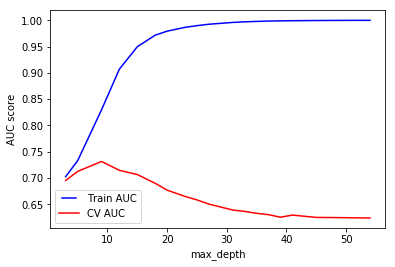

In [46]:
max_depths = [3,5,9,12,15,18,20,23,25,27,31,33,35,37,39,41,45,49,54]
train_results = []
cv_results = []
for depth in tqdm(max_depths):
    rf = DecisionTreeClassifier(max_depth=depth,random_state=0,class_weight='balanced')
    rf.fit(X_tr_sent_vectors, y_tr)
    train_pred = rf.predict(X_tr_sent_vectors)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_tr, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_cv_sent_vectors)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_cv, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    cv_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, cv_results, 'r', label='CV AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.show()

In [47]:
optimal_max_depth = 10
clf = DecisionTreeClassifier(max_depth=optimal_max_depth,random_state=0,class_weight='balanced')
clf = clf.fit(X_tr_sent_vectors, y_tr);
pred = clf.predict(X_cv_sent_vectors);
sc = f1_score(y_cv, pred) * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 10 and score is = 84.448322


### Performance measure of Test Data on Trained Model with optimal value of max_depth different performance metrix

In [48]:
clf = DecisionTreeClassifier(max_depth=optimal_max_depth,random_state=0,class_weight='balanced')
clf = clf.fit(X_tr_sent_vectors, y_tr);
pred = clf.predict(X_test_sent_vectors);
sc = f1_score(y_test, pred) * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 10 and score is = 84.683091


In [49]:
sc = f1_score(y_test, pred,average='weighted') * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 10 and score is = 79.319526


In [50]:
sc = recall_score(y_test, pred) * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 10 and score is = 76.622337


In [51]:
sc = precision_score(y_test, pred) * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 10 and score is = 94.639243



The confusion_matrix of the DT with max_depth = 10 
[[ 2618  1139]
 [ 6135 20108]]


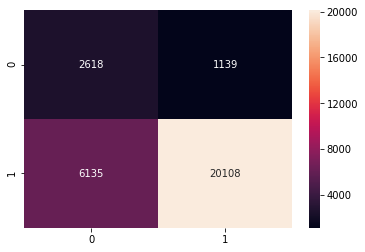

In [52]:
confusion_matrix_val = confusion_matrix(y_test, pred)
print('\nThe confusion_matrix of the DT with max_depth = %d ' % (optimal_max_depth))
print(confusion_matrix_val);

cunfusion_lable = confusion_matrix_val
ax = sns.heatmap(confusion_matrix_val,annot=cunfusion_lable, fmt='')

In [53]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel() 
print("\n Test confusion_matrix for max_depth = %d " %(optimal_max_depth))

TPR = ((tp)/(fn+tp)) * float(100);
FPR = (fp)/(tn+fp) * float(100);
FNR = (fn)/(fn+tp) * float(100);
TNR = (tn)/(tn+fp) * float(100)
print('\n******* for AVG WORD2VEC *********')
print('\n****TPR is %d%%' % (TPR))
print('\n****FPR is %d%%' % (FPR))
print('\n****FNR is %d%%' % (FNR))
print('\n****TNR is %d%%' % (TNR))


 Test confusion_matrix for max_depth = 10 

******* for AVG WORD2VEC *********

****TPR is 76%

****FPR is 30%

****FNR is 23%

****TNR is 69%


***** AVG WORD2VEC ENDS ****

## TF-IDF weighted Word2Vec

In [54]:
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tf_idf_vect.get_feature_names(), list(tf_idf_vect.idf_)))

In [55]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

X_tr_tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(X_tr_list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = X_tr_w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    X_tr_tfidf_sent_vectors.append(sent_vec)
    row += 1

print(len(X_tr_tfidf_sent_vectors))
print(len(X_tr_tfidf_sent_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 49000/49000 [02:49<00:00, 289.63it/s]


49000
50


In [56]:
#--new way TF-IDF weighted Word2Vec for cv with train data 
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

X_cv_tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(X_cv_list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = X_tr_w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    X_cv_tfidf_sent_vectors.append(sent_vec)
    row += 1

#--------------------------------------------------new way
print(len(X_cv_tfidf_sent_vectors))
print(len(X_cv_tfidf_sent_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 21000/21000 [01:15<00:00, 278.20it/s]


21000
50


In [57]:
#--new way TF-IDF weighted Word2Vec for cv with train data 
   # TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

X_test_tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(X_test_list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = X_tr_w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    X_test_tfidf_sent_vectors.append(sent_vec)
    row += 1

#--------------------------------------------------new way
print(len(X_test_tfidf_sent_vectors))
print(len(X_test_tfidf_sent_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [01:51<00:00, 270.25it/s]


30000
50


### Apply Simple Crossvalidation on TF-IDF weighted Word2Vec - Hyperparameter(depth) tuning

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [01:49<00:00,  6.23s/it]


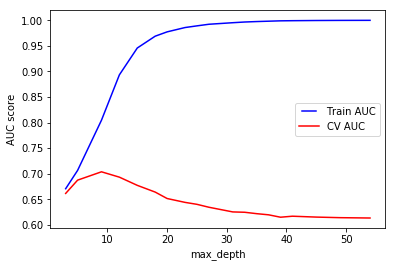

In [58]:
max_depths = [3,5,9,12,15,18,20,23,25,27,31,33,35,37,39,41,45,49,54]
train_results = []
cv_results = []
for depth in tqdm(max_depths):
    rf = DecisionTreeClassifier(max_depth=depth,random_state=0,class_weight='balanced')
    rf.fit(X_tr_tfidf_sent_vectors, y_tr)
    train_pred = rf.predict(X_tr_tfidf_sent_vectors)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_tr, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_cv_tfidf_sent_vectors)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_cv, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    cv_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, cv_results, 'r', label='CV AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.show()

In [59]:
optimal_max_depth = 9
clf = DecisionTreeClassifier(max_depth=optimal_max_depth,random_state=0,class_weight='balanced')
clf = clf.fit(X_tr_tfidf_sent_vectors, y_tr);
pred = clf.predict(X_cv_tfidf_sent_vectors);
sc = f1_score(y_cv, pred) * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 9 and score is = 80.539379


### Performance measure of Test Data on Trained Model with optimal value of max_depth different performance metrix

In [60]:
clf = DecisionTreeClassifier(max_depth=optimal_max_depth,random_state=0,class_weight='balanced')
clf = clf.fit(X_tr_tfidf_sent_vectors, y_tr);
pred = clf.predict(X_test_tfidf_sent_vectors);
sc = f1_score(y_test, pred) * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 9 and score is = 80.686920


In [61]:
sc = f1_score(y_test, pred,average='weighted') * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 9 and score is = 75.242320


In [62]:
sc = recall_score(y_test, pred) * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 9 and score is = 70.540716


In [63]:
sc = precision_score(y_test, pred) * 100
print("Performance for DT with max_depth = %d and score is = %f"%(optimal_max_depth,sc))

Performance for DT with max_depth = 9 and score is = 94.242224



The confusion_matrix of the DT with max_depth = 9 
[[ 2626  1131]
 [ 7731 18512]]


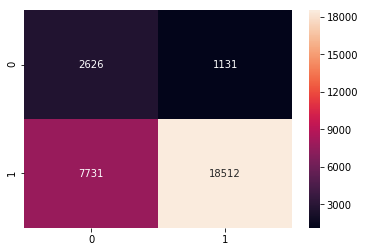

In [64]:
confusion_matrix_val = confusion_matrix(y_test, pred)
print('\nThe confusion_matrix of the DT with max_depth = %d ' % (optimal_max_depth))
print(confusion_matrix_val);

cunfusion_lable = confusion_matrix_val
ax = sns.heatmap(confusion_matrix_val,annot=cunfusion_lable, fmt='')

In [65]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel() 
print("\n Test confusion_matrix for max_depth = %d " %(optimal_max_depth))

TPR = ((tp)/(fn+tp)) * float(100);
FPR = (fp)/(tn+fp) * float(100);
FNR = (fn)/(fn+tp) * float(100);
TNR = (tn)/(tn+fp) * float(100)
print('\n******* for TF-IDF weighted Word2Vec *********')
print('\n****TPR is %d%%' % (TPR))
print('\n****FPR is %d%%' % (FPR))
print('\n****FNR is %d%%' % (FNR))
print('\n****TNR is %d%%' % (TNR))


 Test confusion_matrix for max_depth = 9 

******* for TF-IDF weighted Word2Vec *********

****TPR is 70%

****FPR is 30%

****FNR is 29%

****TNR is 69%


*****TF-IDF weighted Word2Vec****

## Conclusion

In [69]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer","Model" ,"max_depth", " F1","Weighted F1","Recall","precision","TPR","FPR","FNR","TNR"]

x.add_row(["BOW","DT",10,72.90,77.90,65.76,95.52,65,21,34,78])
x.add_row(["TF-IDF","DT",12,75.55,80.66,69.78,95.56,69,22,30,77])
x.add_row(["AVG W2V","DT",10,79.31,84.68,76.62,94.63,76,30,23,69])
x.add_row(["TF-IDF W2v","DT",9,75.24,80.65,70.54,94.24,70,30,29,69])


print(x)

+------------+-------+-----------+-------+-------------+--------+-----------+-----+-----+-----+-----+
| Vectorizer | Model | max_depth |   F1  | Weighted F1 | Recall | precision | TPR | FPR | FNR | TNR |
+------------+-------+-----------+-------+-------------+--------+-----------+-----+-----+-----+-----+
|    BOW     |   DT  |     10    |  72.9 |     77.9    | 65.76  |   95.52   |  65 |  21 |  34 |  78 |
|   TF-IDF   |   DT  |     12    | 75.55 |    80.66    | 69.78  |   95.56   |  69 |  22 |  30 |  77 |
|  AVG W2V   |   DT  |     10    | 79.31 |    84.68    | 76.62  |   94.63   |  76 |  30 |  23 |  69 |
| TF-IDF W2v |   DT  |     9     | 75.24 |    80.65    | 70.54  |   94.24   |  70 |  30 |  29 |  69 |
+------------+-------+-----------+-------+-------------+--------+-----------+-----+-----+-----+-----+
